In [ ]:
import torch

In [ ]:
x = torch.tensor([1., 2.])

In [ ]:
print(x)

tensor([1., 2.])


In [ ]:
x = torch.tensor([1., 2.])

In [ ]:
y = torch.tensor([3., 4.])

In [ ]:
print(x * y)

tensor([3., 8.])


In [ ]:
x = torch.tensor([[1., 2.], [5., 3.], [0., 4.]])

In [ ]:
print(x[0][1])

tensor(2.)


In [ ]:
print(x[0][1].item())

2.0


In [ ]:
x.shape

torch.Size([3, 2])

In [ ]:
cuda = torch.device('cuda')

In [ ]:
x = torch.tensor([5., 3.], device=cuda)

In [ ]:
y = torch.tensor([4., 2.]).cuda()

In [ ]:
x * y

tensor([20.,  6.], device='cuda:0')

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim 
import torch.nn.functional as F 
import torch.utils.data as data 
from torch.autograd import Variable 

In [ ]:
train = pd.read_csv("train.csv")

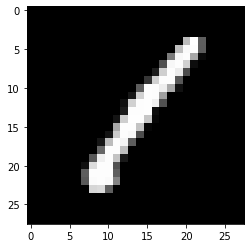

In [ ]:
plt.imshow(np.reshape(train.values[0][1:], (28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_labels = train['label'].values

In [ ]:
train_labels[0:5]

array([1, 0, 1, 4, 0])

In [ ]:
train = train.drop("label", axis=1).values.reshape(len(train), 1, 28, 28)

In [ ]:
train[0]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,
           0,   0,   0

In [ ]:
X = torch.Tensor(train.astype(float))
y = torch.Tensor(train_labels).long()

In [ ]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 392)
    self.fc2 = nn.Linear(392, 196)
    self.fc3 = nn.Linear(196, 98)
    self.fc4 = nn.Linear(98, 10)

    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x

In [ ]:
model = MNISTClassifier()
loss_function = nn.NLLLoss()
optim = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(50):

  images = Variable(X)
  labels = Variable(y)

  optim.zero_grad()
  outputs = model(images)

  loss = loss_function(outputs, labels)
  loss.backward()
  optim.step()

  print('Epoch [%d%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))

Epoch [150] Loss: 7.6725
Epoch [250] Loss: 4.6258
Epoch [350] Loss: 3.0874
Epoch [450] Loss: 2.1218
Epoch [550] Loss: 1.6864
Epoch [650] Loss: 1.5149
Epoch [750] Loss: 1.3064
Epoch [850] Loss: 1.2067
Epoch [950] Loss: 1.0847
Epoch [1050] Loss: 0.9710
Epoch [1150] Loss: 0.9514
Epoch [1250] Loss: 0.8675
Epoch [1350] Loss: 0.7767
Epoch [1450] Loss: 0.7316
Epoch [1550] Loss: 0.6823
Epoch [1650] Loss: 0.6164
Epoch [1750] Loss: 0.5396
Epoch [1850] Loss: 0.5402
Epoch [1950] Loss: 0.4901
Epoch [2050] Loss: 0.4876
Epoch [2150] Loss: 0.4622
Epoch [2250] Loss: 0.4112
Epoch [2350] Loss: 0.4313
Epoch [2450] Loss: 0.3725
Epoch [2550] Loss: 0.3274
Epoch [2650] Loss: 0.3164
Epoch [2750] Loss: 0.2851
Epoch [2850] Loss: 0.2657
Epoch [2950] Loss: 0.2369
Epoch [3050] Loss: 0.2418
Epoch [3150] Loss: 0.2244
Epoch [3250] Loss: 0.1966
Epoch [3350] Loss: 0.2092
Epoch [3450] Loss: 0.1750
Epoch [3550] Loss: 0.1563
Epoch [3650] Loss: 0.1553
Epoch [3750] Loss: 0.1594
Epoch [3850] Loss: 0.1433
Epoch [3950] Loss: 0.

In [ ]:
test = pd.read_csv('test.csv')
test_labels = test['label'].values
test = test.drop("label", axis=1).values.reshape(len(test), 1, 28, 28)


In [ ]:
X_test = torch.Tensor(test.astype(float))
y_test = torch.Tensor(test_labels).long()

In [ ]:
preds = model(X_test)

In [ ]:
print(preds[0])

tensor([-1.7613e+01, -2.4363e+01, -1.9700e+01, -1.6417e+01, -1.0198e+01,
        -2.2823e+01, -1.4991e+01, -1.2639e+01, -1.0893e+01, -5.9603e-05],
       grad_fn=<SelectBackward>)


In [ ]:
_, predictionlabel = torch.max(preds.data, 1)
predictionlabel = predictionlabel.tolist()

predictionlabel = pd.Series(predictionlabel)
test_labels = pd.Series(test_labels)

pred_table = pd.concat([predictionlabel, test_labels], axis=1)
pred_table.columns = ['Predicted Value', 'True Value']

display(pred_table.head())

,Predicted Value,True Value
0,9,9
1,5,5
2,6,2
3,4,4
4,1,1


In [ ]:
preds = len(predictionlabel)
correct = len([1 for x,y in zip(predictionlabel, test_labels) if x==y])
print((correct/preds)*100)

87.5


# **Bag of Words Excerise**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn, optim

In [ ]:
"Veinte paginas".lower().split()

['veinte', 'paginas']

In [ ]:
training_data = [
        ("Veinte paginas".lower().split(), "Spanish"),
        ("I will visit the library".lower().split(), "English"),
        ("I am reading a book".lower().split(), "English"),
        ("This is my favourite chapter".lower().split(), "English"),
        ("Estoy en la biblioteca".lower().split(), "Spanish"),
        ("Tengo un libro".lower().split(), "Spanish")
        ]

test_data = [
        ("Estoy leyendo".lower().split(), "Spanish"),
        ("This is not my favourite book".lower().split(), "English")
        ]

In [ ]:
word_dict = {}
i = 0
for words, language, in training_data + test_data:
  for word in words:
    if word not in word_dict:
      word_dict[word] = i
      i = i + 1

print(word_dict)

{'veinte': 0, 'paginas': 1, 'i': 2, 'will': 3, 'visit': 4, 'the': 5, 'library': 6, 'am': 7, 'reading': 8, 'a': 9, 'book': 10, 'this': 11, 'is': 12, 'my': 13, 'favourite': 14, 'chapter': 15, 'estoy': 16, 'en': 17, 'la': 18, 'biblioteca': 19, 'tengo': 20, 'un': 21, 'libro': 22, 'leyendo': 23, 'not': 24}


In [ ]:
corpus_size = len(word_dict)

In [ ]:
languages = 2
label_index = {"Spanish": 0, "English": 1}

In [ ]:
class BagofWordsClassifier(nn.Module):

  def __init__(self, languages, corpus_size):
    super(BagofWordsClassifier, self).__init__()
    self.linear = nn.Linear(corpus_size, languages)

  def forward(self, bow_vec):
    return F.log_softmax(self.linear(bow_vec), dim=1)

In [ ]:
def make_bow_vector(sentence, word_index):
  word_vec = torch.zeros(corpus_size)
  for word in sentence:
    word_vec[word_dict[word]] = word_vec[word_dict[word]] + 1
    return word_vec.view(1, -1)

def make_target(label, label_index):
  return torch.LongTensor([label_index[label]])

In [ ]:
model = BagofWordsClassifier(languages, corpus_size)

In [ ]:
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
for epoch in range(100):
  for sentence, label in training_data:
    model.zero_grad()

    bow_vec = make_bow_vector(sentence, word_dict)
    target = make_target(label, label_index)

    log_probs = model(bow_vec)

    loss = loss_function(log_probs, target)
    loss.backward()
    optimizer.step()


  if epoch % 10 == 0:
    print("Epoch: ", str(epoch+1), ', Loss: ' + str(loss.item()))

Epoch:  1 , Loss: 0.8219043016433716
Epoch:  11 , Loss: 0.3324577212333679
Epoch:  21 , Loss: 0.20158183574676514
Epoch:  31 , Loss: 0.14216488599777222
Epoch:  41 , Loss: 0.10888990759849548
Epoch:  51 , Loss: 0.08785148710012436
Epoch:  61 , Loss: 0.07344108819961548
Epoch:  71 , Loss: 0.06299366056919098
Epoch:  81 , Loss: 0.05509194731712341
Epoch:  91 , Loss: 0.04891715198755264


In [ ]:
def make_predictions(data):

  with torch.no_grad():
    sentence = data[0]
    label = data[1]
    bow_vec = make_bow_vector(sentence, word_dict)
    log_probs = model(bow_vec)
    print(sentence)
    print(label + ':')
    print(np.exp(log_probs))

make_predictions(test_data[0])
make_predictions(test_data[1])

['estoy', 'leyendo']
Spanish:
tensor([[0.9572, 0.0428]])
['this', 'is', 'not', 'my', 'favourite', 'book']
English:
tensor([[0.0609, 0.9391]])


In [ ]:
def return_params(word):
  index = word_dict[word]
  for p in model.parameters():
    dims = len(p.size())
    if dims == 2:
      print(word + ':')
      print('Spanish parameter = ' + str(p[0][index].item()))
      print('English parameter = ' + str(p[1][index].item()))
      print('\n')


return_params('estoy')
return_params('book')

estoy:
Spanish parameter = 1.2694374322891235
English parameter = -1.2339251041412354


book:
Spanish parameter = -0.1148541197180748
English parameter = -0.19091644883155823




In [ ]:
new_sentence = (["not"], "English")
make_predictions(new_sentence)

['not']
English:
tensor([[0.6562, 0.3438]])
